## Information on **Noise on observations** : 

This experiment has for goal to see what is the effect of adding noise on the observation trajectory of the main agent. The output of this experiment is boolean. It records if a collision occurred between the main agent and one of its neighbors. 

First, an *optimal* perturbation of the observation trajectory that leads to a collision is found with the s-attack method. Noise is then added to this corrupted observation trajectory.

For the same scene, 100 noise realizations were done, meaning that the number of collisions for a single scene is an integer between 0 and 100. The noise is described with its standard deviation $\sigma$. The noise was added only on the last 3 timesteps of the observable trajectory.

The plot generated is explained below.

For this experiment, only 100 scenes of the dataset were used.

### Code : 

To generate those data, the file *noise_on_traj_exp.py* was used. This file itself reuses the structure of *trajnetbaselines/lstm/run.py*.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/00_results.txt", sep="\t")
print(df.shape[0])
df.head()

560


,scene,sigma,num_col
0,0,0.01,99
1,0,0.03,61
2,0,0.05,33
3,0,0.07,18
4,0,0.09,17


In [3]:
no_col = df[(df["num_col"] == 0) & (df["sigma"] == 0.01)]
no_col.shape[0]
no_col_idx = set(no_col["scene"])
all_no_col = df[df["scene"].isin(no_col_idx)]
all_no_col[all_no_col["num_col"] != 0]

#if 0.01 = no col, all above don't have one


,scene,sigma,num_col


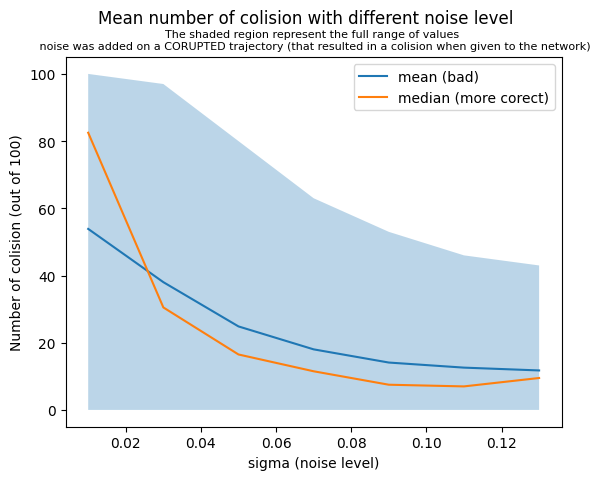

In [19]:
m = df.groupby("sigma")["num_col"].mean()
med = df.groupby("sigma")["num_col"].median()
std = df.groupby("sigma")["num_col"].std()
q_05 = df.groupby("sigma")["num_col"].quantile(0.025)
q_95 = df.groupby("sigma")["num_col"].quantile(0.975)
min = df.groupby("sigma")["num_col"].min()
max = df.groupby("sigma")["num_col"].max()
plt.plot(m, label = "mean (bad)") #mean
plt.plot(med, label = "median (more corect)")
plt.fill_between(min.index, min, max, alpha = 0.3)
#plt.fill_between(min.index, m- std, m + std, alpha = 0.3)
plt.xlabel("sigma (noise level)")
plt.ylabel("Number of colision (out of 100)")
plt.suptitle("Mean number of colision with different noise level")
plt.title("The shaded region represent the full range of values \n noise was added on a CORUPTED trajectory " +
          "(that resulted in a colision when given to the network)", fontsize = 8)
plt.legend()

For various noise levels, noise was added 100 times on each scene, and the number of collision is recorded, and then averaged for all scenes.

This plot shows the mean and median of all scenes. 

As expected, we see that with bigger noise, the optimal perturbation is "drowned" in the noise. This results in less collision, as the preduction model (d-pool s-LSTM) is trained to output noise-free colision.